In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import copy
import sys

percentOfObstacle = 0.9  # 30% - 60%, random

def generateMap2d(size_):
    """Generates a random 2d generate_map with obstacles (small blocks) randomly distributed.
       You can specify any size of this generate_map but your solution has to be independent of generate_map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid generate_map, e.g. [60, 60]. The height and width of the generate_map shall be greater than 20.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid generate_map, cells with a value of 0: Free cell;
                                                -1: Obstacle;
                                                -2: Start point;
                                                -3: Goal point;
    """

    size_x, size_y = size_[0], size_[1]

    map2d = np.random.rand(size_y, size_x)
    perObstacles_ = percentOfObstacle
    map2d[map2d <= perObstacles_] = 0
    map2d[map2d > perObstacles_] = -1

    yloc, xloc = [np.random.randint(0, size_x - 1, 2), np.random.randint(0, size_y - 1, 2)]
    while (yloc[0] == yloc[1]) and (xloc[0] == xloc[1]):
        yloc, xloc = [np.random.randint(0, size_x - 1, 2), np.random.randint(0, size_y - 1, 2)]

    map2d[xloc[0]][yloc[0]] = -2
    map2d[xloc[1]][yloc[1]] = -3

    return map2d


# Generate 2d grid generate_map with rotated-get_he_env-shape object
def generateMap2d_obstacle(size_):
    """Generates a random 2d generate_map with a rotated-get_he_env-shape object in the middle and obstacles (small blocks) randomly distributed.
       You can specify any size of this generate_map but your solution has to be independent of generate_map size

    Parameters:
    -----------
    size_ : list
        Width and height of the 2d grid generate_map, e.g. [60, 60]. The height and width of the generate_map shall be greater than 40.

    Returns:
    --------
        map2d : array-like, shape (size_[0], size_[1])
           A 2d grid generate_map, cells with a value of 0: Free cell;
                                               -1: Obstacle;
                                               -2: Start point;
                                               -3: Goal point;

       [ytop, ybot, minx] : list
           information of the rotated-get_he_env-shape object
           ytop - y coordinate of the top horizontal wall/part
           ybot - y coordinate of the bottom horizontal wall/part
           minx - X coordinate of the vertical wall
    """

    size_x, size_y = size_[0], size_[1]
    map2d = generateMap2d(size_)

    map2d[map2d == -2] = 0
    map2d[map2d == -3] = 0

    # add special obstacle
    xtop = [np.random.randint(5, 3 * size_x // 10 - 2),
            np.random.randint(7 * size_x // 10 + 3, size_x - 5)]
    ytop = np.random.randint(7 * size_y // 10 + 3, size_y - 5)
    xbot = np.random.randint(3, 3 * size_x // 10 - 5), np.random.random_integers(7 * size_x // 10 + 3,
                                                                                 size_x - 5)
    ybot = np.random.randint(5, size_y // 5 - 3)

    map2d[ybot, xbot[0]:xbot[1] + 1] = -1
    map2d[ytop, xtop[0]:xtop[1] + 1] = -1
    minx = (xbot[0] + xbot[1]) // 2
    maxx = (xtop[0] + xtop[1]) // 2
    if minx > maxx:
        tempx = minx
        minx = maxx
        maxx = tempx
    if maxx == minx:
        maxx = maxx + 1

    map2d[ybot:ytop, minx:maxx] = -1
    startp = [np.random.randint(0, size_x // 2 - 4), np.random.randint(ybot + 1, ytop - 1)]

    map2d[startp[1], startp[0]] = -2
    goalp = [np.random.randint(size_x // 2 + 4, size_x - 3), np.random.randint(ybot + 1, ytop - 1)]

    map2d[goalp[1], goalp[0]] = -3
    # return map2d, [startp[1], startp[0]], [goalp[1], goalp[0]], [ytop, ybot]
    return map2d, [ytop, ybot, minx]

# helper function for plotting the result
def plotMap(map2d_, path_, title_=''):
    print("path is:", path_)
    # path_=path_[:(len(path_)//2)]
    '''Plots a generate_map (image) of a 2d matrix with a path from start_point point to the goal point. 
        cells with a value of 0: Free cell; 
                             -1: Obstacle;
                             -2: Start point;
                             -3: Goal point;
    Parameters:
    -----------
    map2d_ : array-like
        an array with Real Numbers
        
    path_ : array-like
        an array of 2d corrdinates (of the path) in the format of [[x0, y0], [x1, y1], [x2, y2], ..., [x_end, y_end]]
        
    title_ : string
        information/description of the plot

    Returns:
    --------

    '''

    import matplotlib.cm as cm
    plt.interactive(False)

    colors_nn = int(map2d_.max())
    colors = cm.winter(np.linspace(0, 1, colors_nn))

    colorsMap2d = [[[] for x in range(map2d_.shape[1])] for y in range(map2d_.shape[0])]
    # Assign RGB Val for starting point and ending point
    locStart, locEnd = np.where(map2d_ == -2), np.where(map2d_ == -3)

    colorsMap2d[locStart[0][0]][locStart[1][0]] = [.0, .0, .0, 1.0]  # black
    colorsMap2d[locEnd[0][0]][locEnd[1][0]] = [.0, .0, .0, 1.0]  # white

    # Assign RGB Val for obstacle
    locObstacle = np.where(map2d_ == -1)
    for iposObstacle in range(len(locObstacle[0])):
        colorsMap2d[locObstacle[0][iposObstacle]][locObstacle[1][iposObstacle]] = [1.0, .0, .0, 1.0]
    # Assign 0
    locZero = np.where(map2d_ == 0)

    for iposZero in range(len(locZero[0])):
        colorsMap2d[locZero[0][iposZero]][locZero[1][iposZero]] = [1.0, 1.0, 1.0, 1.0]

    # Assign Expanded nodes
    locExpand = np.where(map2d_ > 0)

    for iposExpand in range(len(locExpand[0])):
        _idx_ = int(map2d_[locExpand[0][iposExpand]][locExpand[1][iposExpand]] - 1)
        colorsMap2d[locExpand[0][iposExpand]][locExpand[1][iposExpand]] = colors[_idx_]

    for irow in range(len(colorsMap2d)):
        for icol in range(len(colorsMap2d[irow])):
            if colorsMap2d[irow][icol] == []:
                colorsMap2d[irow][icol] = [1.0, 0.0, 0.0, 1.0]

    path = path_.T.tolist()

    plt.figure()
    plt.title(title_)
    plt.imshow(colorsMap2d, interpolation='nearest')
    plt.colorbar()
    plt.plot(path[:][0], path[:][1], color='magenta', linewidth=2.5)
    plt.show()
    

In [8]:
class Parent_way: 
    def __init__(self, x, y, cost = 0):
        self.x = x
        self.y = y
        self.cost = cost  
        self.parent = None
        self.get_path_cost = 0

    def __eq__(self, child):

        if child is None:  
            return False
        if self.y == child.y and self.x == child.x:
            return True
        else:
            return False

    def __lt__(self, get_child):
        if get_child.cost > self.cost:
            return True
        else:
            return False

    def display_way(self):
        print('__(x,y)=', '(', self.x, ',', self.y, ')')

In [9]:
def maze_Environment(points, mazeEnvironment):  
    d = mazeEnvironment[points.y][points.x]
    return d  

def returnShortestPath(lastState):
    arr = []
    if lastState.parent is None:
        arr.append([lastState.y, lastState.x])
        return arr
    arr = returnShortestPath(lastState.parent)
    arr.append([lastState.y, lastState.x])
    return arr

def showBestPath(lastState):  
    if lastState.parent is None:
        print("Show The Best Path: ")
        lastState.display_way()
        return None
    showBestPath(lastState.parent)
    lastState.display_way()
    return lastState.cost

def rightChild(parentPoint, get_he_env, mazeEnvironment, dimensionOfX):
    if parentPoint.x < (dimensionOfX - 1):
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.x += 1
        if mazeEnvironment[temp_cord.y][temp_cord.x] == 0:
            temp_cord.x = -1
            return temp_cord
        temp_cord.parent = parentPoint
        temp_cord.get_path_cost = parentPoint.get_path_cost + 1
        temp_cord.cost = get_he_env[(temp_cord.y, temp_cord.x)]
        return temp_cord
    else:
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.x = -1
        return temp_cord

def uppChild(parentPoint, get_he_env, mazeEnvironment):
    if parentPoint.y > 0:
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.y -= 1
        if mazeEnvironment[temp_cord.y][temp_cord.x] == 0:
            temp_cord.x = -1
            return temp_cord
        temp_cord.parent = parentPoint
        temp_cord.get_path_cost = parentPoint.get_path_cost + 1
        temp_cord.cost = get_he_env[(temp_cord.y, temp_cord.x)]
        return temp_cord
    else:
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.x = -1
        return temp_cord

def leftChild(parentPoint, get_he_env, mazeEnvironment):
    if parentPoint.x > 0:
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.x -= 1
        if mazeEnvironment[temp_cord.y][temp_cord.x] == 0:
            temp_cord.x = -1
            return temp_cord
        temp_cord.parent = parentPoint
        temp_cord.get_path_cost = parentPoint.get_path_cost + 1
        temp_cord.cost = get_he_env[(temp_cord.y, temp_cord.x)]
        return temp_cord
    else:
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.x = -1
        return temp_cord
    
def childChild(parentPoint, get_he_env, mazeEnvironment, dimensionOfY):
    if parentPoint.y < (dimensionOfY - 1):
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.y += 1
        if mazeEnvironment[temp_cord.y][temp_cord.x] == 0:
            temp_cord.x = -1
            return temp_cord
        temp_cord.parent = parentPoint
        temp_cord.get_path_cost = parentPoint.get_path_cost + 1
        temp_cord.cost = get_he_env[(temp_cord.y, temp_cord.x)]
        return temp_cord
    else:
        temp_cord = adjustCords([parentPoint.y, parentPoint.x])
        temp_cord.x = -1
        return temp_cord   

def heuManhattan(mazeEnvironment, get_he_env, dimension, goal):
    for x in range(0, dimension[0]):
        for y in range(0, dimension[1]):
            if mazeEnvironment[x][y] == -3 or mazeEnvironment[x][y] == 1 or mazeEnvironment[x][y] == -2:
                v = abs(x - goal[0]) + abs(y - goal[1])
                tempReg = (x, y)
                get_he_env[tempReg] = v
    return None

def adjustCords(points):
    points = Parent_way(points[1], points[0])
    return points
 

def heuEuclidean(mazeEnvironment, get_he_env, dimension, goal):
    for x in range(0, dimension[0]):
        for y in range(0, dimension[1]):
            if mazeEnvironment[x][y] == 1 or mazeEnvironment[x][y] == -2 or mazeEnvironment[x][y] == -3:
                v = abs(x - goal[0]) ** 2 + abs(y - goal[1]) ** 2
                v = math.sqrt(v)
                tempReg = (x, y)
                get_he_env[tempReg] = v
    return None
    

def BFS(mazeEnvironment, dimension, start, goal, CheckHeuristic = 0):
    H = {}
    temporaryC = ""
    if CheckHeuristic == 1:
        heuEuclidean(mazeEnvironment, H, dimension, goal)
    else:
        heuManhattan(mazeEnvironment, H, dimension, goal)
    run_queueSearch = []
    been_visit = []
    initState = Parent_way(start[1], start[0], H[(start[0], start[1])])
    Parent_way(goal[1], goal[0], H[(goal[0], goal[1])])
    run_queueSearch.append(initState)
    cost = 0
    visitedCost = 0
    while len(run_queueSearch) != 0:
        run_queueSearch.sort()
        temporaryC = run_queueSearch.pop(0)
        been_visit.append(temporaryC)
        visitedCost = visitedCost + 1
        if temporaryC.y == goal[0] and temporaryC.x == goal[1]:
            break

        rightChild_cords = rightChild(temporaryC, H, mazeEnvironment, dimension[1])
        if not (rightChild_cords.x == -1):
            if not (rightChild_cords in run_queueSearch or rightChild_cords in been_visit):
                if (mazeEnvironment[rightChild_cords.y][rightChild_cords.x] == -3 or mazeEnvironment[rightChild_cords.y][rightChild_cords.x] == 1):
                    cost = cost + 1
                    run_queueSearch.append(rightChild_cords)
                    
        leftChild_cords = leftChild(temporaryC, H, mazeEnvironment)
        if not (leftChild_cords.x == -1):
            if not (leftChild_cords in been_visit or leftChild_cords in run_queueSearch):
                if (mazeEnvironment[leftChild_cords.y][leftChild_cords.x] == -3 or mazeEnvironment[leftChild_cords.y][leftChild_cords.x] == 1):
                    cost = cost + 1
                    run_queueSearch.append(leftChild_cords)  
                    
        uppChild_cords = uppChild(temporaryC, H, mazeEnvironment);
        if not (uppChild_cords.x == -1):
            if not (uppChild_cords in been_visit or uppChild_cords in run_queueSearch):
                if mazeEnvironment[uppChild_cords.y][uppChild_cords.x] == 1 or mazeEnvironment[uppChild_cords.y][uppChild_cords.x] == -3:
                    cost = cost + 1
                    run_queueSearch.append(uppChild_cords)

        downChild_cords = childChild(temporaryC, H, mazeEnvironment, dimension[0])
        if not (downChild_cords.x == -1):
            if not (downChild_cords in run_queueSearch or downChild_cords in been_visit):
                if (mazeEnvironment[uppChild_cords.y][uppChild_cords.x] == -3 or mazeEnvironment[downChild_cords.y][downChild_cords.x] == 1):
                    cost = cost + 1
                    run_queueSearch.append(downChild_cords)
    shortPath = returnShortestPath(temporaryC)
    return been_visit, shortPath

def DFS(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point, visited_queue, pathQ):
    if ((lower_y >= y_point or upper_y <= y_point) and (mazeEnvironment[y_point][x_point] == 1 or mazeEnvironment[y_point][x_point] == -3 or mazeEnvironment[y_point][x_point] == -2)):
        v = abs(x_point - goal[1]) + abs(y_point - goal[0])
        tempReg = (y_point, x_point)
        he_env[tempReg] = v
        pathQ.append([y_point, x_point])
        return True

    back_flag = False
    if upper_y > y_point:
        visited_queue.append([y_point, x_point])
        if (y_point > 0 and (mazeEnvironment[y_point - 1][x_point] == -3 or mazeEnvironment[y_point - 1][x_point] == 1 or mazeEnvironment[y_point - 1][x_point] == -2)):
            if [y_point - 1, x_point] not in visited_queue:
                back_flag = DFS(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point - 1, visited_queue, pathQ)
        
        if (0 < x_point and back_flag is False and (mazeEnvironment[y_point][x_point - 1] == -3 or mazeEnvironment[y_point][x_point - 1] == 1 or mazeEnvironment[y_point][x_point - 1] == -2)):
            if [y_point, x_point - 1] not in visited_queue:
                back_flag = DFS(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point - 1, y_point, visited_queue, pathQ)
        
        if (dimension[0] - 1 > y_point and back_flag is False and (mazeEnvironment[y_point + 1][x_point] == 1 or mazeEnvironment[y_point + 1][x_point] == -3 or mazeEnvironment[y_point + 1][x_point] == -2)):
            if [y_point + 1, x_point] not in visited_queue:
                back_flag = DFS(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point + 1, visited_queue, pathQ)
        
        if (dimension[1] - 1 > x_point and back_flag is False and (mazeEnvironment[y_point][x_point + 1] == 1 or mazeEnvironment[y_point][x_point + 1] == -3 or mazeEnvironment[y_point][x_point + 1] == -2)):
            if [y_point, x_point + 1] not in visited_queue:
                back_flag = DFS(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point - 1, visited_queue, pathQ)

    if back_flag is True:
        v = abs(y_point - goal[0]) + abs(x_point - goal[1])
        tempReg = (y_point, x_point)
        he_env[tempReg] = v
        pathQ.append([y_point, x_point])
        return back_flag
    else:
        return back_flag
    

def A_start(mazeEnvironment, dimension, start_point, goal, CheckHeuristicSearch = 0):
    temporaryC = ""
    he_env = {}
    if CheckHeuristicSearch == 1:  
        heuEuclidean(mazeEnvironment, he_env, dimension, goal)
    else:
        heuManhattan(mazeEnvironment, he_env, dimension, goal)
    beenVisited = []
    test = []
    initState = Parent_way(start_point[1], start_point[0], he_env[(start_point[0], start_point[1])])
    Parent_way(goal[1], goal[0], he_env[(goal[0], goal[1])])
    test.append(initState)
    cost = 0
    visitedCost = 0
    while len(test) != 0:
        test.sort()
        temporaryC = test.pop(0)
        beenVisited.append(temporaryC)
        visitedCost = visitedCost + 1
        if temporaryC.y == goal[0] and temporaryC.x == goal[1]:
            break

                    
        leftChild_cords = leftChild(temporaryC, he_env, mazeEnvironment)
        if not (leftChild_cords.x == -1):
            if not (leftChild_cords in beenVisited or leftChild_cords in test):
                if (mazeEnvironment[leftChild_cords.y][leftChild_cords.x] == 1 or
                        mazeEnvironment[leftChild_cords.y][
                            leftChild_cords.x] == -3):
                    leftChild_cords.cost += leftChild_cords.get_path_cost
                    cost = cost + 1
                    test.append(leftChild_cords)
                    
        upperChild_cords = uppChild(temporaryC, he_env, mazeEnvironment)
        if not (upperChild_cords.x == -1):
            if not (upperChild_cords in beenVisited or upperChild_cords in test):
                if mazeEnvironment[upperChild_cords.y][upperChild_cords.x] == 1 or \
                        mazeEnvironment[upperChild_cords.y][
                            upperChild_cords.x] == -3:
                    upperChild_cords.cost += upperChild_cords.get_path_cost
                    cost = cost + 1
                    test.append(upperChild_cords)

        rightChild_cords = rightChild(temporaryC, he_env, mazeEnvironment, dimension[1])
        if not (rightChild_cords.x == -1):
            if not (rightChild_cords in beenVisited or rightChild_cords
                    in test):
                if (mazeEnvironment[rightChild_cords.y][rightChild_cords.x] == 1 or
                        mazeEnvironment[rightChild_cords.y][
                            rightChild_cords.x] == -3):
                    rightChild_cords.cost += rightChild_cords.get_path_cost
                    cost = cost + 1
                    test.append(rightChild_cords)


        downChild_cords = childChild(temporaryC, he_env, mazeEnvironment, dimension[0])
        if not (downChild_cords.x == -1):
            if not (downChild_cords in beenVisited or downChild_cords in test):
                if (mazeEnvironment[downChild_cords.y][downChild_cords.x] == 1 or
                        mazeEnvironment[upperChild_cords.y][
                            upperChild_cords.x] == -3):
                    downChild_cords.cost += downChild_cords.get_path_cost
                    cost = cost + 1
                    test.append(downChild_cords)
                    
    shortestPath = returnShortestPath(temporaryC)
    print("A_start is done!")
    return beenVisited, shortestPath

def specific_heuManhattan(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X):
    mSize = sys.maxsize
    for x in range(0, dimension[0]):
        for y in range(0, dimension[1]):
            if mazeEnvironment[x][y] == 1 or mazeEnvironment[x][y] == -3 or mazeEnvironment[x][y] == -2:
                if X > y and upper_y > x > lower_y:
                    v = mSize
                    tempReg = (x, y)
                    he_env[tempReg] = v
                else:
                    v = abs(y - goal[1]) + abs(x - goal[0])
                    tempReg = (x, y)
                    he_env[tempReg] = v
    y_point = start[0]
    x_point = start[1]
    been_visit = []
    pathQ = []
    DFS(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point, been_visit, pathQ)
    return None

def specific_heuEuclidean(mazeEnvironment, get_he_env, dimension, start, goal, upper_y, lower_y, X):
    Msize = sys.maxsize
    for x in range(0, dimension[0]):
        for y in range(0, dimension[1]):
            if mazeEnvironment[x][y] == 1 or mazeEnvironment[x][y] == -3 or mazeEnvironment[x][y] == -2:
                if X > y and upper_y > x > lower_y:
                    v = Msize
                    tempReg = (x, y)
                    get_he_env[tempReg] = v
                else:
                    v = abs(x - goal[0]) + abs(y - goal[1])
                    tempReg = (x, y)
                    get_he_env[tempReg] = v
    y_point = start[0]
    x_point = start[1]
    pathQ = []
    been_visit = []
    depthFirst_heuEuclidean(mazeEnvironment, get_he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point, been_visit, pathQ)
    return None

def depthFirst_heuEuclidean(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point, been_visit, pathQ):
    if ((mazeEnvironment[y_point][x_point] == 1 or mazeEnvironment[y_point][x_point] == -3 or mazeEnvironment[y_point][x_point] == -2) and (upper_y <= y_point or lower_y >= y_point)):
        v = abs(x_point - goal[1]) + abs(y_point - goal[0])
        tempReg = (y_point, x_point)
        he_env[tempReg] = v
        pathQ.append([y_point, x_point])
        return True

    back_flag = False
    if upper_y > y_point:
        been_visit.append([y_point, x_point])
        if (y_point > 0 and (mazeEnvironment[y_point - 1][x_point] == 1 or mazeEnvironment[y_point - 1][x_point] == -3 or mazeEnvironment[y_point - 1][x_point] == -2)):
            if [y_point - 1, x_point] not in been_visit:
                back_flag = depthFirst_heuEuclidean(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point - 1, been_visit, pathQ)
        if (back_flag is False and x_point > 0 and (mazeEnvironment[y_point][x_point - 1] == 1 or mazeEnvironment[y_point][x_point - 1] == -3 or mazeEnvironment[y_point][x_point - 1] == -2)):
            if [y_point, x_point - 1] not in been_visit:
                back_flag = depthFirst_heuEuclidean(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point - 1, y_point, been_visit, pathQ)
        
        if (back_flag is False and y_point < dimension[0] - 1 and (mazeEnvironment[y_point + 1][x_point] == 1 or  mazeEnvironment[y_point + 1][x_point]== -3 or mazeEnvironment[y_point + 1][x_point] == -2)):
            if [y_point + 1, x_point] not in been_visit:
                back_flag = depthFirst_heuEuclidean(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point + 1, been_visit, pathQ)
        
        if (back_flag is False and x_point < dimension[1] - 1 and (
                mazeEnvironment[y_point][x_point + 1] == 1 or  mazeEnvironment[y_point][x_point + 1]== -3 or mazeEnvironment[y_point][x_point + 1] == -2)):
            if [y_point, x_point + 1] not in been_visit:
                back_flag = depthFirst_heuEuclidean(mazeEnvironment, he_env, dimension, start, goal, upper_y, lower_y, X, x_point, y_point - 1, been_visit, pathQ)

    if back_flag:
        v = abs(y_point - goal[0]) + abs(x_point - goal[1])
        tempReg = (y_point, x_point)
        he_env[tempReg] = v
        pathQ.append([y_point, x_point])
        return back_flag
    else:
        return back_flag

def AStar_her(get_info, mazeEnvironment, dimension, start, goal, CheckHeuristic = 0):
    temporaryC = ""
    he_env = {}
    if CheckHeuristic == 1:  
        specific_heuEuclidean(mazeEnvironment, he_env, dimension, start, goal, get_info[0], get_info[1], get_info[2])
    else:
        specific_heuManhattan(mazeEnvironment, he_env, dimension, start, goal, get_info[0], get_info[1], get_info[2])
    runningQueue = []
    been_visit = []
    initState = Parent_way(start[1], start[0], he_env[(start[0], start[1])])
    Parent_way(goal[1], goal[0], he_env[(goal[0], goal[1])])
    runningQueue.append(initState)
    cost = 0
    visitedCost = 0
    while len(runningQueue) != 0:
        runningQueue.sort()
        temporaryC = runningQueue.pop(0)
        been_visit.append(temporaryC)
        visitedCost = visitedCost + 1
        if temporaryC.y == goal[0] and temporaryC.x == goal[1]:
            break
            
        rightChild_cords = rightChild(temporaryC, he_env, mazeEnvironment, dimension[1])
        if not (rightChild_cords.x == -1):
            if not (rightChild_cords in runningQueue or rightChild_cords in been_visit):
                if (mazeEnvironment[rightChild_cords.y][rightChild_cords.x] == -3 or mazeEnvironment[rightChild_cords.y][rightChild_cords.x] == 1):
                    rightChild_cords.cost += rightChild_cords.get_path_cost
                    cost = cost + 1
                    runningQueue.append(rightChild_cords)
                    
        uppChild_cords = uppChild(temporaryC, he_env, mazeEnvironment)
        if not (uppChild_cords.x == -1):
            if not (uppChild_cords in runningQueue or uppChild_cords in been_visit):
                if mazeEnvironment[uppChild_cords.y][uppChild_cords.x] == -3 or mazeEnvironment[uppChild_cords.y][uppChild_cords.x] == 1:
                    uppChild_cords.cost += uppChild_cords.get_path_cost
                    cost = cost + 1
                    runningQueue.append(uppChild_cords)

        leftChild_cords = leftChild(temporaryC, he_env, mazeEnvironment)
        if not (leftChild_cords.x == -1):
            if not (leftChild_cords in runningQueue or leftChild_cords in been_visit):
                if (mazeEnvironment[leftChild_cords.y][leftChild_cords.x] == -3 or mazeEnvironment[leftChild_cords.y][leftChild_cords.x] == 1):
                    leftChild_cords.cost += leftChild_cords.get_path_cost
                    cost = cost + 1
                    runningQueue.append(leftChild_cords)

        downChild_cords = childChild(temporaryC, he_env, mazeEnvironment, dimension[0])
        if not (downChild_cords.x == -1):
            if not (downChild_cords in runningQueue or downChild_cords in been_visit):
                if (mazeEnvironment[uppChild_cords.y][uppChild_cords.x] == -3 or mazeEnvironment[downChild_cords.y][downChild_cords.x] == 1):
                    downChild_cords.cost +=  downChild_cords.get_path_cost
                    cost = cost + 1
                    runningQueue.append(downChild_cords)
    shortPath = returnShortestPath(temporaryC)
    print("A_start is done!")
    return been_visit, shortPath

def get_adaptor(mapp):
    initialing_Cords = [0, 0]
    the_final_one = [0, 0]
    for x in range(0, len(mapp)):
        for y in range(0, len(mapp[0])):
            if mapp[x][y] == -3:
                the_final_one[0] = x
                the_final_one[1] = y
            elif mapp[x][y] == -1:
                mapp[x][y] = 0
            elif mapp[x][y] == 0:
                mapp[x][y] = 1
            elif mapp[x][y] == -2:
                initialing_Cords[0] = x
                initialing_Cords[1] = y

    print("initial Cord for x:", initialing_Cords[1], "initial Cord for y:", initialing_Cords[0])
    print("final Cord for x:", the_final_one[1], "final Cord y:", the_final_one[0])
    return mapp, [len(mapp), len(mapp[0])], initialing_Cords, the_final_one

def arrReverse(path):  # this function will execute after algorithm work
    for i in range(len(path)):
        temp = path[i][0]
        path[i][0] = path[i][1]
        path[i][1] = temp
    return path

def A_star(mapp, control = 0):
    Path = []
    mapp, dimension, start_point, last_point = get_adaptor(mapp)
    totalPath, opPath = A_start(mapp, dimension, start_point, last_point, control)
    print("\nOptimum Path:", opPath)
    for item in totalPath:
        Path.append([item.y, item.x])
    print("The Total Path:", Path)
    return Path, opPath

def GStar(myMap, control = 0):
    Path = []
    myMap, dimension, start_point, last_point = get_adaptor(myMap)
    totalPath, opPath = BFS(myMap, dimension, start_point, last_point, control)
    for item in totalPath:
        Path.append([item.y, item.x])
    print("The Total Path:", Path)
    return Path, opPath

def heu_AStar(get_map_for_A_star_algo_search, get_info, control = 0):
    Path = []
    get_map_for_A_star_algo_search, dimension, start_point, last_point = get_adaptor(get_map_for_A_star_algo_search)
    totalPath, opPath = AStar_her(get_info, get_map_for_A_star_algo_search, dimension, start_point, last_point, control)  
    print("\nOptimum Path:", opPath)
    for item in totalPath:
        Path.append([item.y, item.x])
    print("Total Path:", Path)
    return Path, opPath


initial Cord for x: 26 initial Cord for y: 17
final Cord for x: 27 final Cord y: 12
A_start is done!

Optimum Path: [[17, 26], [16, 26], [15, 26], [14, 26], [13, 26], [12, 26], [12, 27]]
The Total Path: [[17, 26], [16, 26], [15, 26], [14, 26], [13, 26], [17, 27], [16, 27], [15, 27], [14, 27], [12, 26], [13, 27], [12, 27]]
path is: [[26 17]
 [26 16]
 [26 15]
 [26 14]
 [26 13]
 [26 12]
 [27 12]]


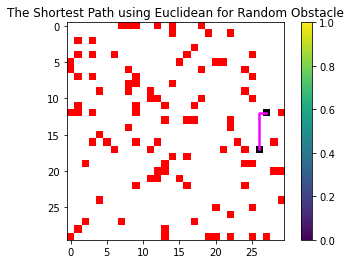

path is: [[26 17]
 [26 16]
 [26 15]
 [26 14]
 [26 13]
 [27 17]
 [27 16]
 [27 15]
 [27 14]
 [26 12]
 [27 13]
 [27 12]]


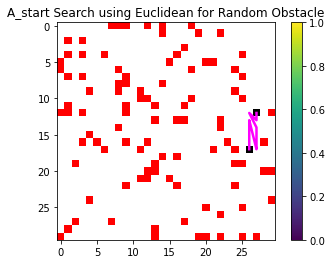

initial Cord for x: 26 initial Cord for y: 17
final Cord for x: 27 final Cord y: 12
The Total Path: [[17, 26], [16, 26], [15, 26], [14, 26], [13, 26], [13, 27], [12, 27]]
path is: [[26 17]
 [26 16]
 [26 15]
 [26 14]
 [26 13]
 [27 13]
 [27 12]]


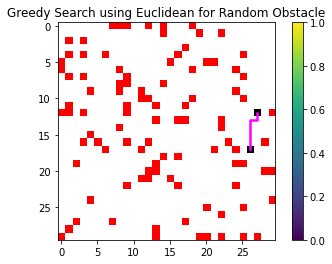

initial Cord for x: 26 initial Cord for y: 17
final Cord for x: 27 final Cord y: 12
A_start is done!

Optimum Path: [[17, 26], [16, 26], [15, 26], [14, 26], [13, 26], [12, 26], [12, 27]]
The Total Path: [[17, 26], [16, 26], [17, 27], [15, 26], [16, 27], [14, 26], [15, 27], [13, 26], [14, 27], [12, 26], [13, 27], [12, 27]]
path is: [[26 17]
 [26 16]
 [26 15]
 [26 14]
 [26 13]
 [26 12]
 [27 12]]


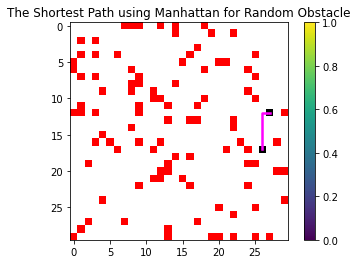

path is: [[26 17]
 [26 16]
 [27 17]
 [26 15]
 [27 16]
 [26 14]
 [27 15]
 [26 13]
 [27 14]
 [26 12]
 [27 13]
 [27 12]]


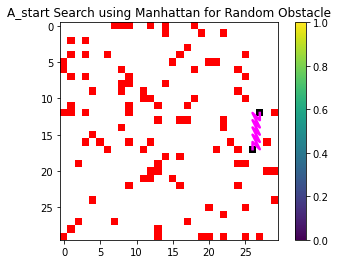

initial Cord for x: 26 initial Cord for y: 17
final Cord for x: 27 final Cord y: 12
The Total Path: [[17, 26], [17, 27], [16, 27], [15, 27], [14, 27], [13, 27], [12, 27]]
path is: [[26 17]
 [27 17]
 [27 16]
 [27 15]
 [27 14]
 [27 13]
 [27 12]]


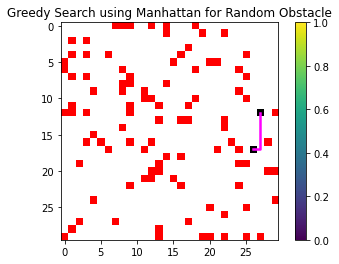

initial Cord for x: 13 initial Cord for y: 21
final Cord for x: 38 final Cord y: 12
A_start is done!

Optimum Path: [[21, 13], [20, 13], [19, 13], [18, 13], [17, 13], [16, 13], [15, 13], [14, 13], [14, 12], [13, 12], [12, 12], [11, 12], [10, 12], [9, 12], [8, 12], [7, 12], [7, 11], [7, 10], [7, 9], [7, 8], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [4, 12], [4, 13], [4, 14], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [5, 36], [5, 37], [5, 38], [5, 39], [5, 40], [5, 41], [6, 41], [7, 41], [8, 41], [8, 42], [9, 42], [10, 42], [10, 41], [10, 40], [10, 39], [11, 39], [12, 39], [12, 38]]
Total Path: [[21, 13], [20, 13], [19, 13], [18, 13], [17, 13], [16, 13], [15, 13], [14, 13], [14, 12], [13, 12], [12, 12], [11, 12], [10, 12], [9, 12], [8, 12], [7, 12], [7, 11], [7, 

C:\Users\nkill\AppData\Local\Temp\ipykernel_17332\1127094946.py:80: DeprecationWarning: This function is deprecated. Please call randint(38, 45 + 1) instead
  xbot = np.random.randint(3, 3 * size_x // 10 - 5), np.random.random_integers(7 * size_x // 10 + 3,


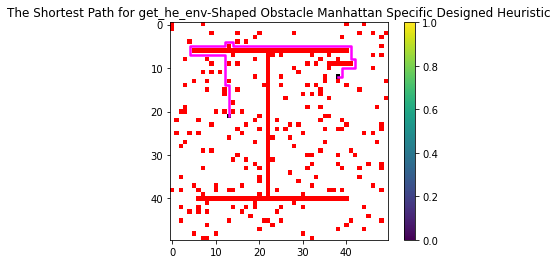

path is: [[13 21]
 [13 20]
 [13 19]
 [13 18]
 [13 17]
 [13 16]
 [13 15]
 [13 14]
 [12 14]
 [12 13]
 [12 12]
 [12 11]
 [12 10]
 [12  9]
 [12  8]
 [12  7]
 [11  7]
 [10  7]
 [ 9  7]
 [ 8  7]
 [ 7  7]
 [ 6  7]
 [ 5  7]
 [ 4  7]
 [ 4  6]
 [ 4  5]
 [ 3  6]
 [ 5  5]
 [ 6  5]
 [ 7  5]
 [ 8  5]
 [ 9  5]
 [10  5]
 [11  5]
 [12  5]
 [ 3  5]
 [ 2  6]
 [ 5  4]
 [ 6  4]
 [ 7  4]
 [ 8  4]
 [ 9  4]
 [10  4]
 [11  4]
 [12  4]
 [13  4]
 [14  4]
 [14  5]
 [15  5]
 [16  5]
 [17  5]
 [18  5]
 [19  5]
 [20  5]
 [21  5]
 [22  5]
 [23  5]
 [24  5]
 [25  5]
 [26  5]
 [27  5]
 [28  5]
 [29  5]
 [30  5]
 [31  5]
 [32  5]
 [33  5]
 [34  5]
 [35  5]
 [36  5]
 [37  5]
 [38  5]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 5  3]
 [ 6  3]
 [ 7  3]
 [ 8  3]
 [ 9  3]
 [10  3]
 [11  3]
 [12  3]
 [13  3]
 [14  3]
 [16  4]
 [18  4]
 [19  4]
 [20  4]
 [21  4]
 [22  4]
 [23  4]
 [24  4]
 [25  4]
 [26  4]
 [27  4]
 [28  4]
 [29  4]
 [30  4]
 [31  4]
 [32  4]
 [33  4]
 [34  4]
 [35  4]
 [36  4]
 [37  4]
 [39  5]
 [38  4]
 [15  3]
 [ 3  3]
 

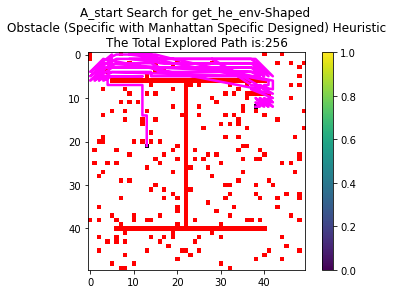

initial Cord for x: 13 initial Cord for y: 21
final Cord for x: 38 final Cord y: 12
A_start is done!

Optimum Path: [[21, 13], [20, 13], [19, 13], [18, 13], [17, 13], [16, 13], [15, 13], [14, 13], [14, 12], [13, 12], [12, 12], [11, 12], [10, 12], [9, 12], [8, 12], [7, 12], [7, 11], [7, 10], [7, 9], [7, 8], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [4, 12], [4, 13], [4, 14], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [5, 36], [5, 37], [5, 38], [5, 39], [5, 40], [5, 41], [6, 41], [7, 41], [8, 41], [8, 42], [9, 42], [10, 42], [10, 41], [10, 40], [10, 39], [11, 39], [12, 39], [12, 38]]
Total Path: [[21, 13], [20, 13], [19, 13], [18, 13], [17, 13], [16, 13], [15, 13], [14, 13], [14, 12], [13, 12], [12, 12], [11, 12], [10, 12], [9, 12], [8, 12], [7, 12], [7, 11], [7, 

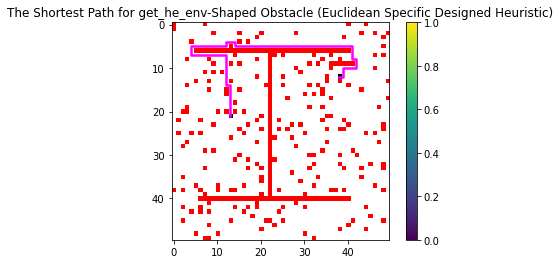

path is: [[13 21]
 [13 20]
 [13 19]
 [13 18]
 [13 17]
 [13 16]
 [13 15]
 [13 14]
 [12 14]
 [12 13]
 [12 12]
 [12 11]
 [12 10]
 [12  9]
 [12  8]
 [12  7]
 [11  7]
 [10  7]
 [ 9  7]
 [ 8  7]
 [ 7  7]
 [ 6  7]
 [ 5  7]
 [ 4  7]
 [ 4  6]
 [ 4  5]
 [ 3  6]
 [ 5  5]
 [ 6  5]
 [ 7  5]
 [ 8  5]
 [ 9  5]
 [10  5]
 [11  5]
 [12  5]
 [ 3  5]
 [ 2  6]
 [ 5  4]
 [ 6  4]
 [ 7  4]
 [ 8  4]
 [ 9  4]
 [10  4]
 [11  4]
 [12  4]
 [13  4]
 [14  4]
 [14  5]
 [15  5]
 [16  5]
 [17  5]
 [18  5]
 [19  5]
 [20  5]
 [21  5]
 [22  5]
 [23  5]
 [24  5]
 [25  5]
 [26  5]
 [27  5]
 [28  5]
 [29  5]
 [30  5]
 [31  5]
 [32  5]
 [33  5]
 [34  5]
 [35  5]
 [36  5]
 [37  5]
 [38  5]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 5  3]
 [ 6  3]
 [ 7  3]
 [ 8  3]
 [ 9  3]
 [10  3]
 [11  3]
 [12  3]
 [13  3]
 [14  3]
 [16  4]
 [18  4]
 [19  4]
 [20  4]
 [21  4]
 [22  4]
 [23  4]
 [24  4]
 [25  4]
 [26  4]
 [27  4]
 [28  4]
 [29  4]
 [30  4]
 [31  4]
 [32  4]
 [33  4]
 [34  4]
 [35  4]
 [36  4]
 [37  4]
 [39  5]
 [38  4]
 [15  3]
 [ 3  3]
 

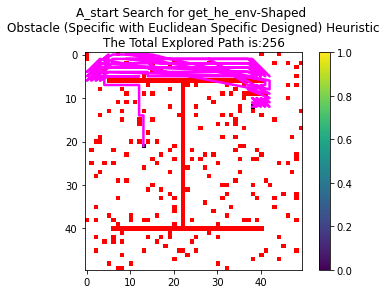

initial Cord for x: 13 initial Cord for y: 21
final Cord for x: 38 final Cord y: 12
A_start is done!

Optimum Path: [[21, 13], [20, 13], [19, 13], [18, 13], [17, 13], [16, 13], [15, 13], [14, 13], [14, 14], [13, 14], [12, 14], [12, 13], [12, 12], [12, 11], [12, 10], [12, 9], [12, 8], [12, 7], [12, 6], [12, 5], [12, 4], [11, 4], [10, 4], [9, 4], [8, 4], [7, 4], [6, 4], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [4, 12], [4, 13], [4, 14], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [5, 36], [5, 37], [5, 38], [5, 39], [5, 40], [5, 41], [6, 41], [7, 41], [8, 41], [8, 42], [9, 42], [10, 42], [10, 41], [10, 40], [10, 39], [11, 39], [12, 39], [12, 38]]
The Total Path: [[21, 13], [20, 13], [21, 14], [19, 13], [21, 15], [18, 13], [19, 14], [20, 15], [21, 16], [17, 13], [19, 15], [21, 17], [16, 13], [17, 14], [18

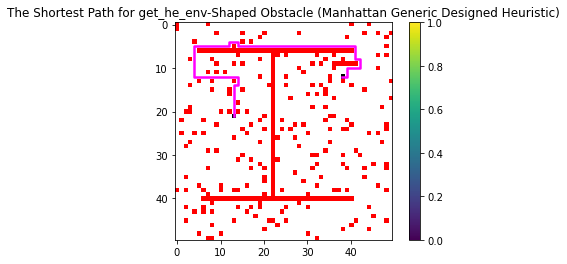

path is: [[13 21]
 [13 20]
 [14 21]
 ...
 [38 11]
 [39 12]
 [38 12]]


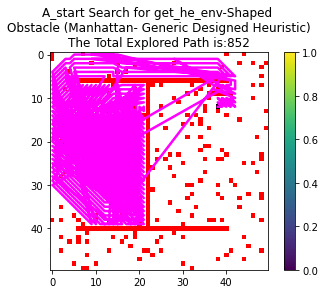

initial Cord for x: 13 initial Cord for y: 21
final Cord for x: 38 final Cord y: 12
A_start is done!

Optimum Path: [[21, 13], [20, 13], [19, 13], [18, 13], [17, 13], [16, 13], [15, 13], [14, 13], [14, 12], [13, 12], [12, 12], [11, 12], [10, 12], [9, 12], [8, 12], [7, 12], [7, 11], [7, 10], [7, 9], [7, 8], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [4, 12], [4, 13], [4, 14], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [5, 33], [5, 34], [5, 35], [5, 36], [5, 37], [5, 38], [5, 39], [5, 40], [5, 41], [6, 41], [7, 41], [8, 41], [8, 42], [9, 42], [10, 42], [10, 41], [10, 40], [10, 39], [11, 39], [12, 39], [12, 38]]
The Total Path: [[21, 13], [21, 14], [21, 15], [21, 16], [21, 17], [21, 18], [21, 19], [20, 13], [20, 15], [20, 17], [20, 18], [20, 19], [20, 20], [20, 21], [22, 13], [19, 13], [22, 1

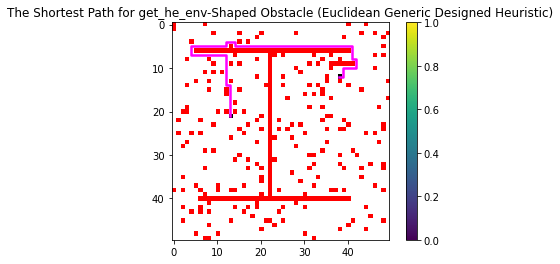

path is: [[13 21]
 [14 21]
 [15 21]
 ...
 [38 11]
 [39 12]
 [38 12]]


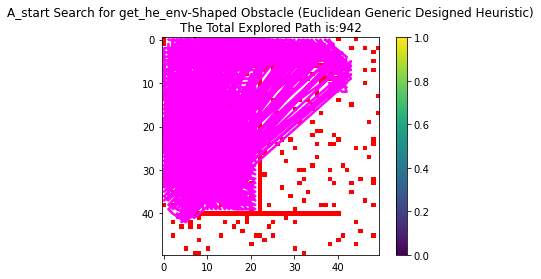

In [10]:
generate_map = generateMap2d([30, 30])
solve_example_map_1 = generate_map

'''Random Obstacle Euclidean'''
map_one = copy.deepcopy(generate_map)
totalPath, optPath = A_star(map_one, 1)
new_optPath = arrReverse(optPath)
example_solved_path = np.array(new_optPath)
plotMap(solve_example_map_1, example_solved_path, "The Shortest Path using Euclidean for Random Obstacle")

new_optPath_total = arrReverse(totalPath)
example_solved_path_total = np.array(new_optPath_total)
plotMap(solve_example_map_1, example_solved_path_total, "A_start Search using Euclidean for Random Obstacle")

tempMap = copy.deepcopy(generate_map)
totalPath2, optPath2 = GStar(tempMap, 1)
new_totalPath2 = arrReverse(totalPath2)
example_solved_path2 = np.array(new_totalPath2)
plotMap(solve_example_map_1, example_solved_path2, "Greedy Search using Euclidean for Random Obstacle")

'''Random Obstacle Manhattan'''
map_one = copy.deepcopy(generate_map)
totalPath, optPath = A_star(map_one)
optPath = arrReverse(optPath)
example_solved_path = np.array(new_optPath)
plotMap(solve_example_map_1, example_solved_path, "The Shortest Path using Manhattan for Random Obstacle")

new_optPath_total = arrReverse(totalPath)
example_solved_path_total = np.array(new_optPath_total)
plotMap(solve_example_map_1, example_solved_path_total, "A_start Search using Manhattan for Random Obstacle")

tempMap = copy.deepcopy(generate_map)
totalPath2, optPath2 = GStar(tempMap)
new_totalPath2 = arrReverse(totalPath2)
example_solved_path2 = np.array(new_totalPath2)
plotMap(solve_example_map_1, example_solved_path2, "Greedy Search using Manhattan for Random Obstacle")

'''For get_he_env-Shaped Obstacle'''
mapp_ = generateMap2d_obstacle([50, 50])
info = copy.deepcopy(mapp_[1])
test = copy.deepcopy(mapp_[0])
totalPath, optPath = heu_AStar(test, info, 0)
new_optPath = arrReverse(optPath)
example_solved_path = np.array(new_optPath)
plotMap(mapp_[0], example_solved_path, "The Shortest Path for get_he_env-Shaped Obstacle Manhattan Specific Designed Heuristic")

new_optPath_total = arrReverse(totalPath)
example_solved_path_total = np.array(new_optPath_total)
strPathLen = "The Total Explored Path is:" + str(len(totalPath))
plotMap(mapp_[0], example_solved_path_total,
        "A_start Search for get_he_env-Shaped \nObstacle (Specific with Manhattan Specific Designed) "
        "Heuristic" + "\n" + strPathLen)

'''With Euclidean Heuristic'''
info = copy.deepcopy(mapp_[1])
test = copy.deepcopy(mapp_[0])
totalPath, optPath = heu_AStar(test, info, 1)
new_optPath = arrReverse(optPath)
example_solved_path = np.array(new_optPath)
plotMap(mapp_[0], example_solved_path, "The Shortest Path for get_he_env-Shaped Obstacle (Euclidean Specific Designed Heuristic)")

new_optPath_total = arrReverse(totalPath)
example_solved_path_total = np.array(new_optPath_total)
strPathLen = "The Total Explored Path is:" + str(len(totalPath))
plotMap(mapp_[0], example_solved_path_total,
        "A_start Search for get_he_env-Shaped \nObstacle (Specific with Euclidean Specific Designed) "
        "Heuristic" + "\n" + strPathLen)

'''- With A Generic-Heuristic
   - With A Manhattan-Heuristic'''
info = copy.deepcopy(mapp_[1])
test = copy.deepcopy(mapp_[0])
totalPath, optPath = A_star(test, 0)
new_optPath = arrReverse(optPath)
example_solved_path = np.array(new_optPath)
plotMap(mapp_[0], example_solved_path, "The Shortest Path for get_he_env-Shaped Obstacle (Manhattan Generic Designed Heuristic)")

new_optPath_total = arrReverse(totalPath)
example_solved_path_total = np.array(new_optPath_total)
strPathLen = "The Total Explored Path is:" + str(len(totalPath))
plotMap(mapp_[0], example_solved_path_total, "A_start Search for get_he_env-Shaped \nObstacle (Manhattan- Generic Designed Heuristic)" + "\n" + strPathLen)

'''With Euclidean Heuristic'''
info = copy.deepcopy(mapp_[1])
test = copy.deepcopy(mapp_[0])
totalPath, optPath = A_star(test, 1)
new_optPath = arrReverse(optPath)
example_solved_path = np.array(new_optPath)
plotMap(mapp_[0], example_solved_path, "The Shortest Path for get_he_env-Shaped Obstacle (Euclidean Generic Designed Heuristic)")

new_optPath_total = arrReverse(totalPath)
example_solved_path_total = np.array(new_optPath_total)
strPathLen = "The Total Explored Path is:" + str(len(totalPath))
plotMap(mapp_[0], example_solved_path_total,
        "A_start Search for get_he_env-Shaped Obstacle (Euclidean Generic Designed Heuristic)" + "\n" + strPathLen)